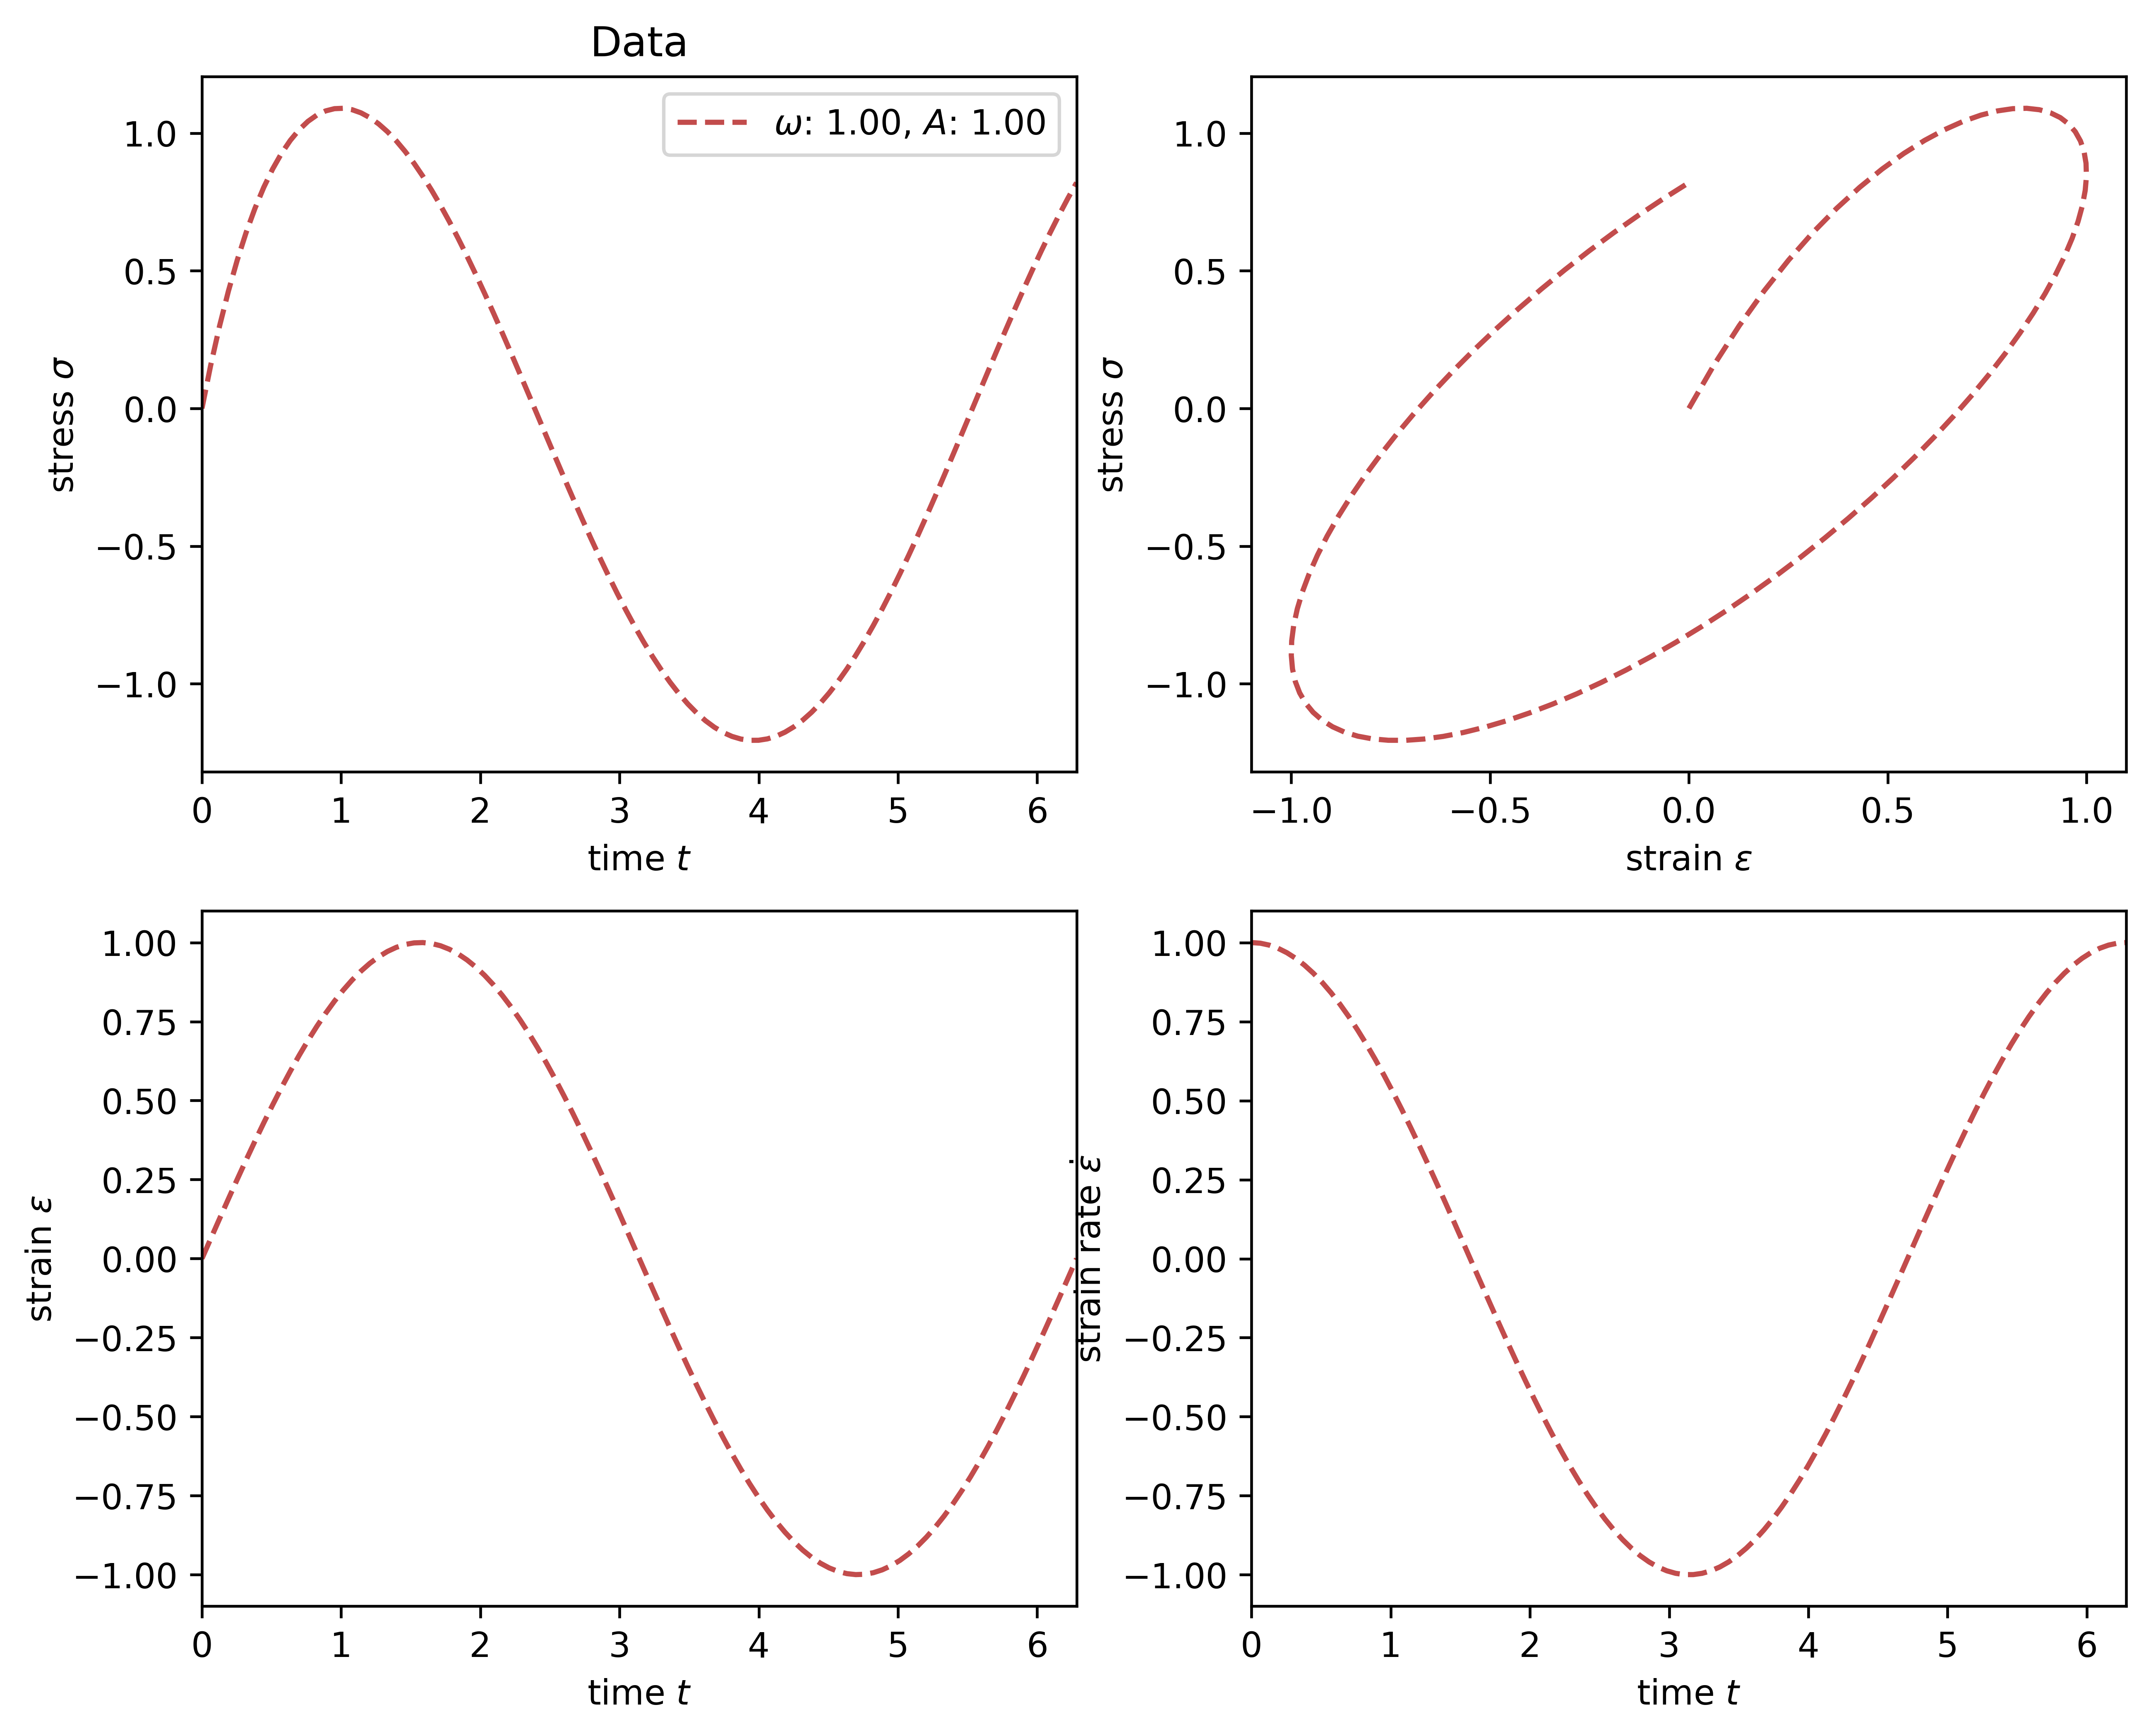

2025-01-28 11:25:12.471677
Epoch 1/5000
1/1 - 3s - loss: 0.6120 - mae: 0.6991 - 3s/epoch - 3s/step
Epoch 2/5000
1/1 - 0s - loss: 0.6100 - mae: 0.6983 - 39ms/epoch - 39ms/step
Epoch 3/5000
1/1 - 0s - loss: 0.6081 - mae: 0.6976 - 44ms/epoch - 44ms/step
Epoch 4/5000
1/1 - 0s - loss: 0.6063 - mae: 0.6969 - 51ms/epoch - 51ms/step
Epoch 5/5000
1/1 - 0s - loss: 0.6046 - mae: 0.6962 - 46ms/epoch - 46ms/step
Epoch 6/5000
1/1 - 0s - loss: 0.6030 - mae: 0.6954 - 46ms/epoch - 46ms/step
Epoch 7/5000
1/1 - 0s - loss: 0.6015 - mae: 0.6947 - 47ms/epoch - 47ms/step
Epoch 8/5000
1/1 - 0s - loss: 0.6001 - mae: 0.6940 - 52ms/epoch - 52ms/step
Epoch 9/5000
1/1 - 0s - loss: 0.5987 - mae: 0.6933 - 49ms/epoch - 49ms/step
Epoch 10/5000
1/1 - 0s - loss: 0.5974 - mae: 0.6926 - 48ms/epoch - 48ms/step
Epoch 11/5000
1/1 - 0s - loss: 0.5961 - mae: 0.6918 - 64ms/epoch - 64ms/step
Epoch 12/5000
1/1 - 0s - loss: 0.5949 - mae: 0.6911 - 46ms/epoch - 46ms/step
Epoch 13/5000
1/1 - 0s - loss: 0.5937 - mae: 0.6904 - 49ms/epo

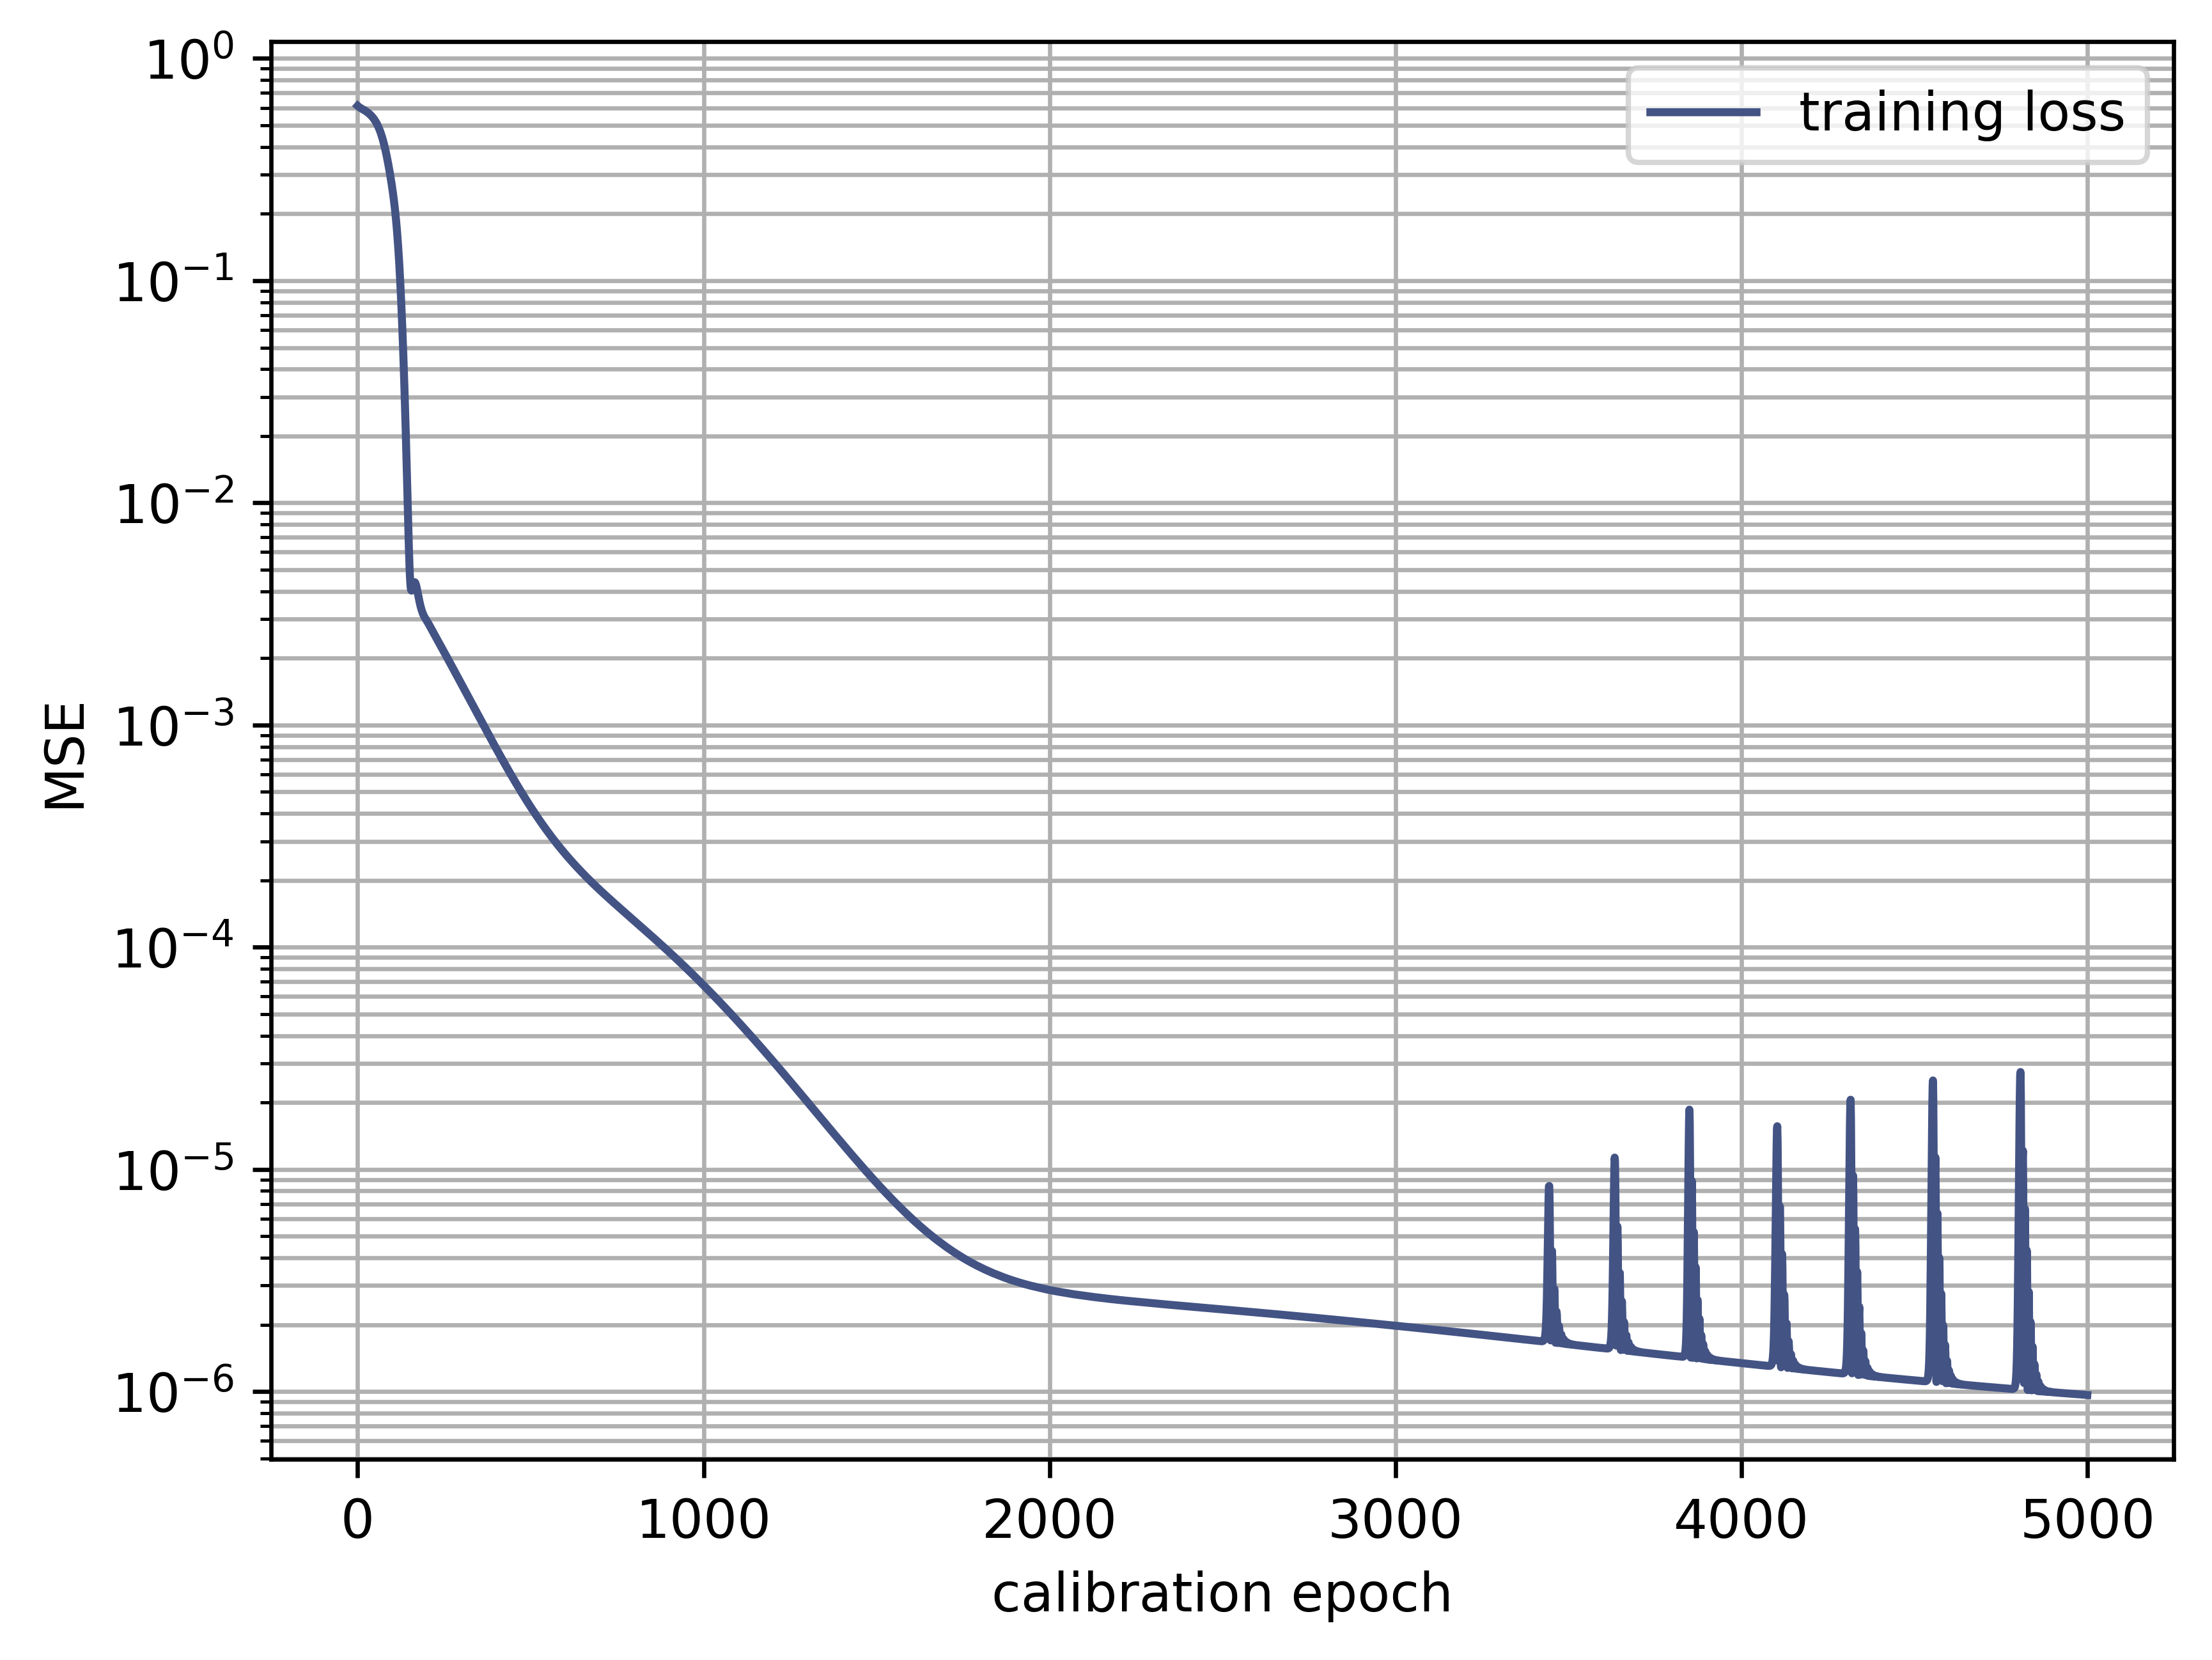

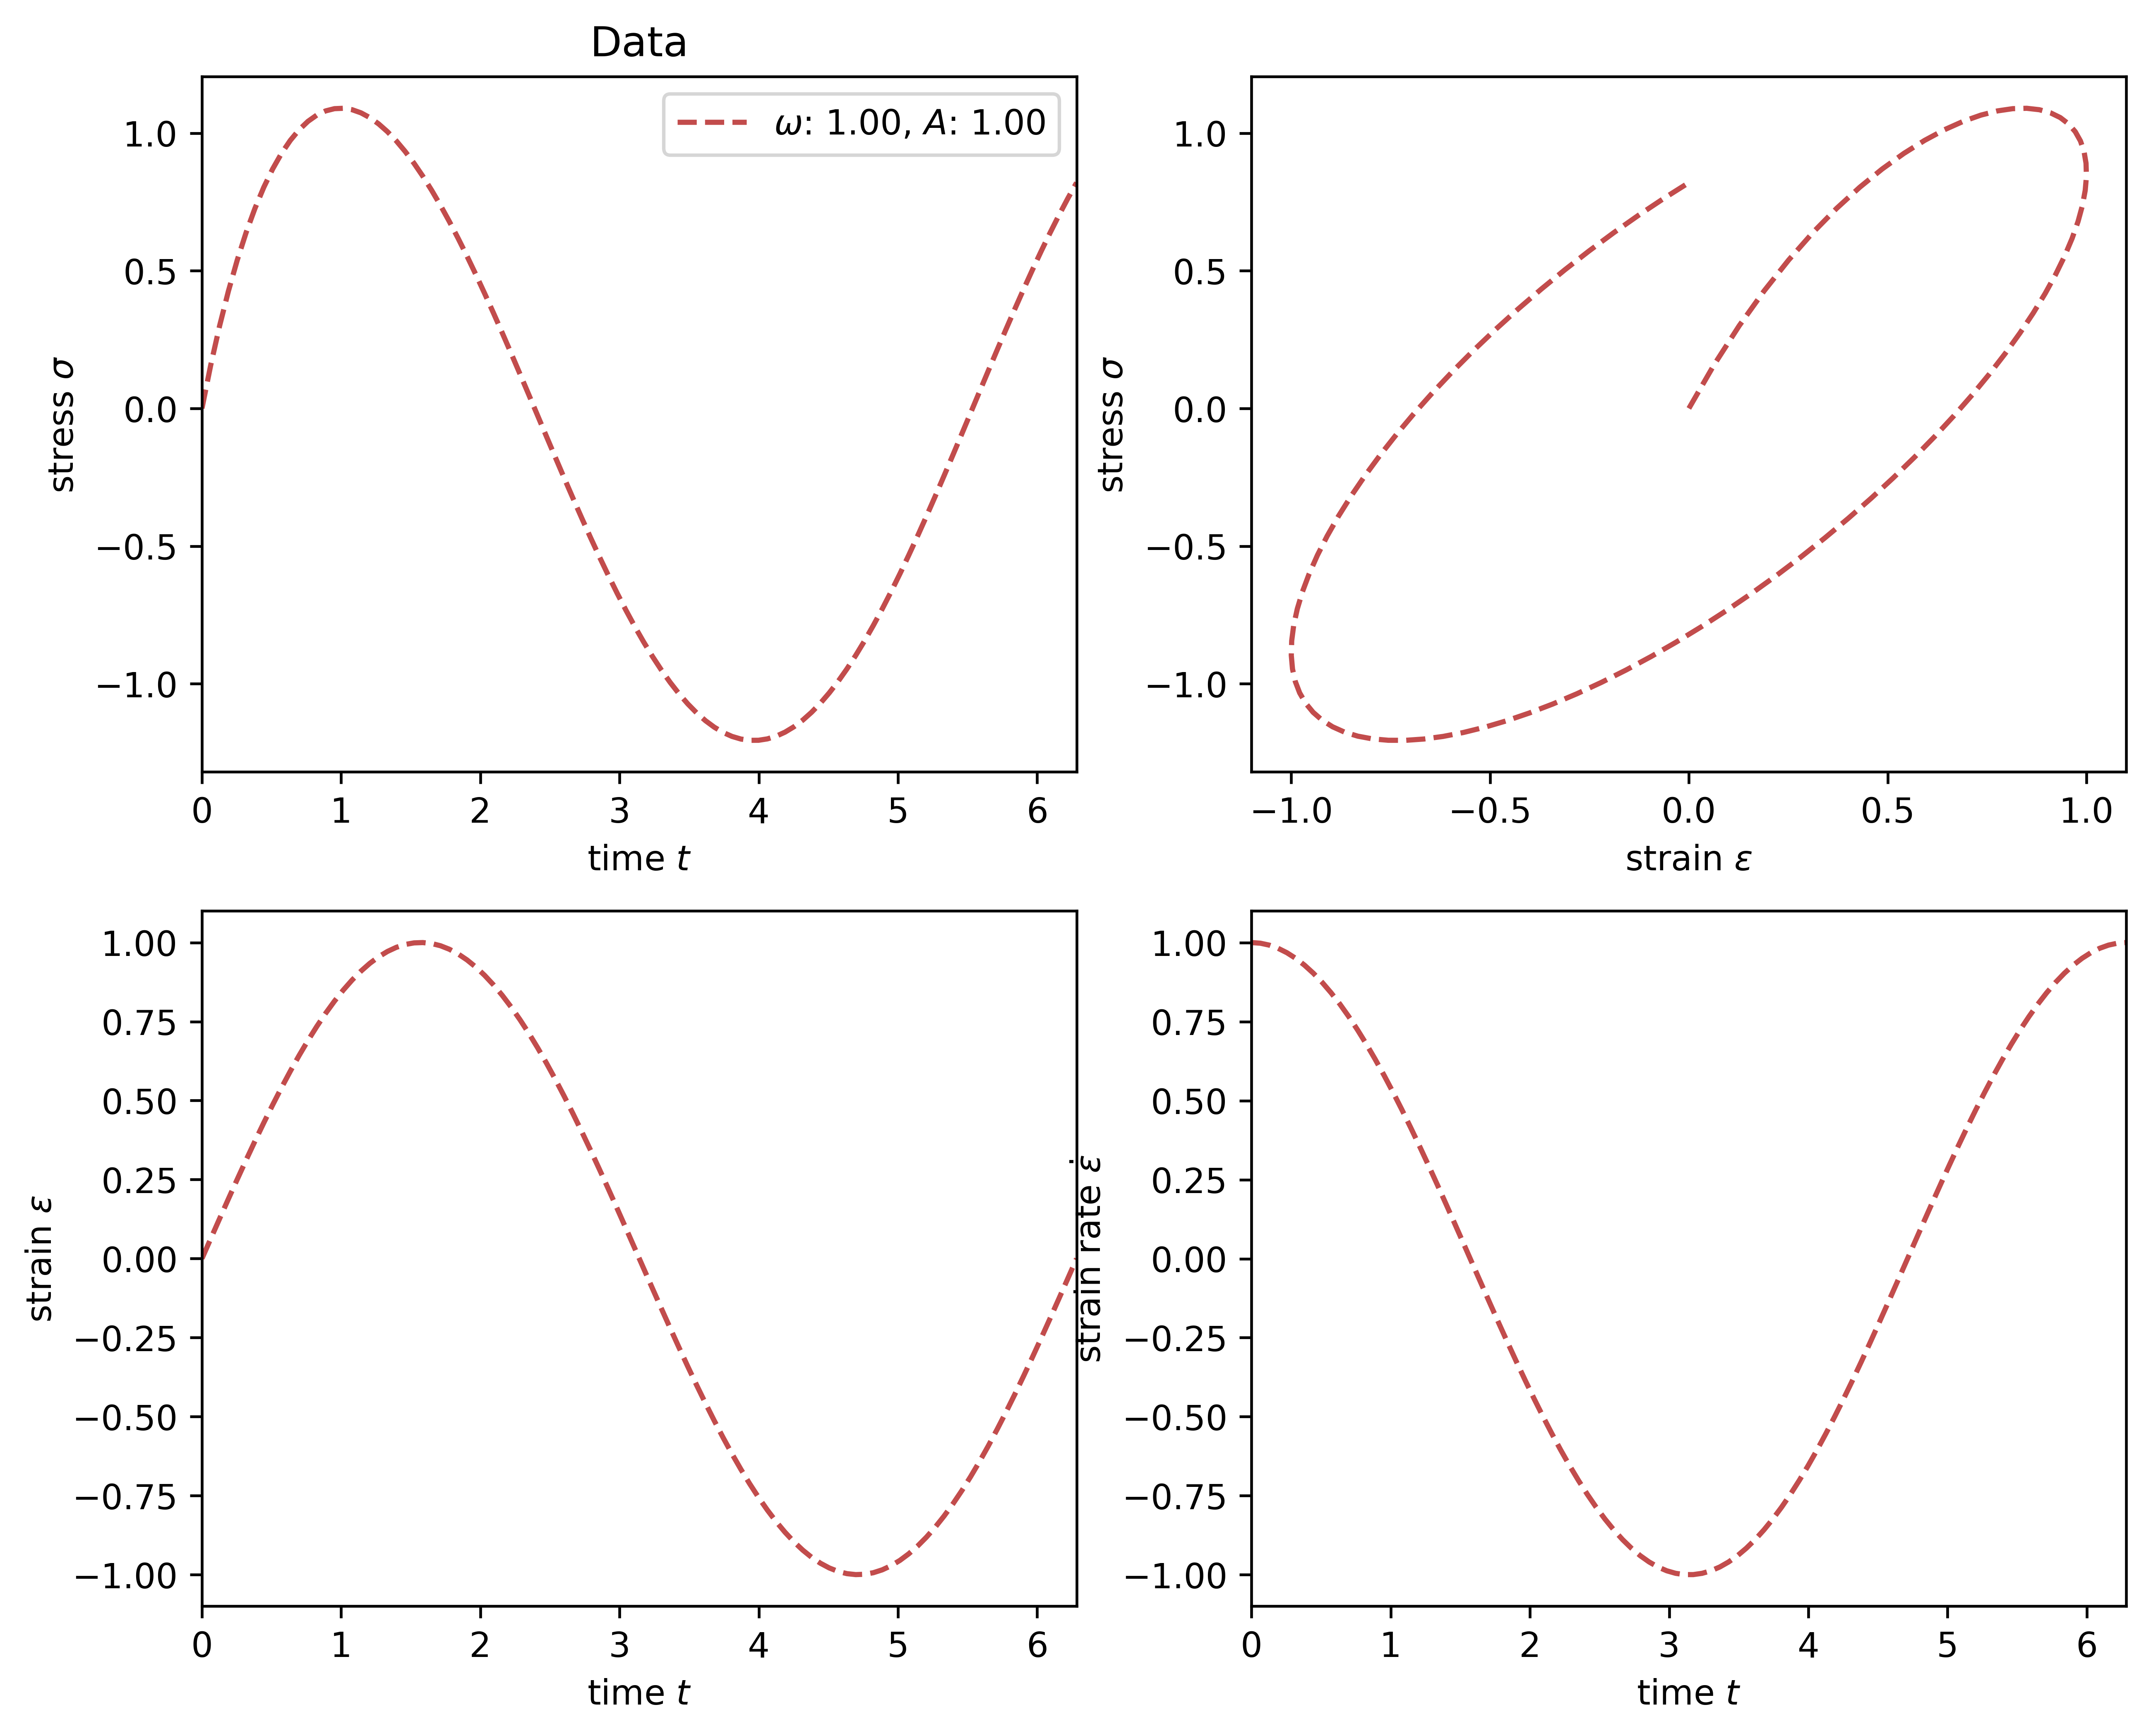

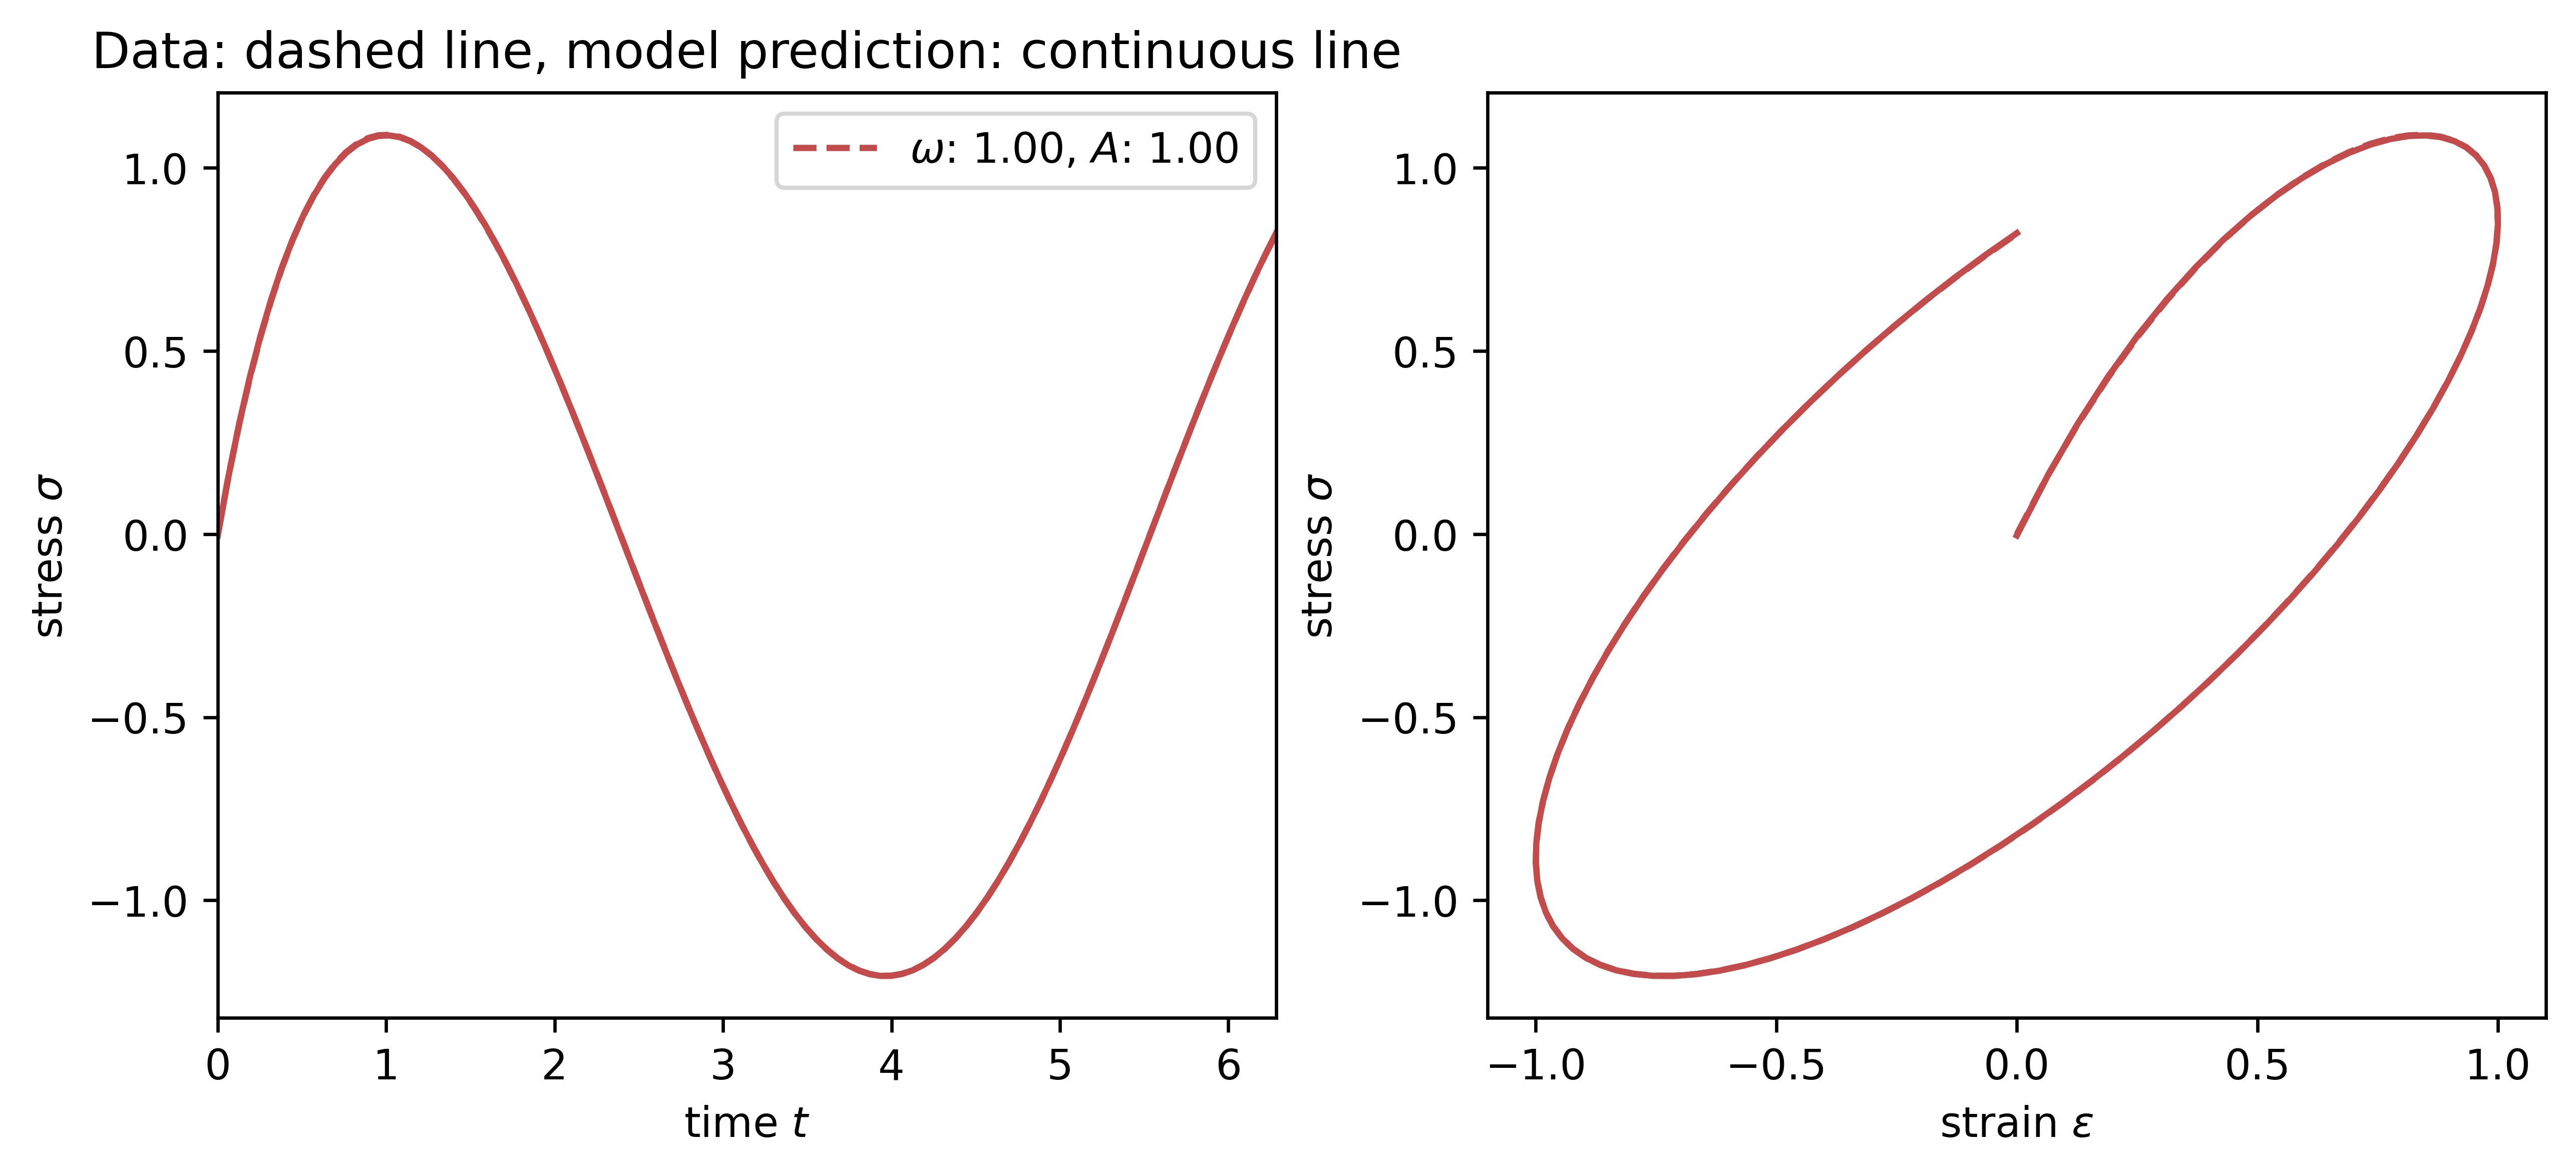

1/1 [==============================] - 0s 63ms/step


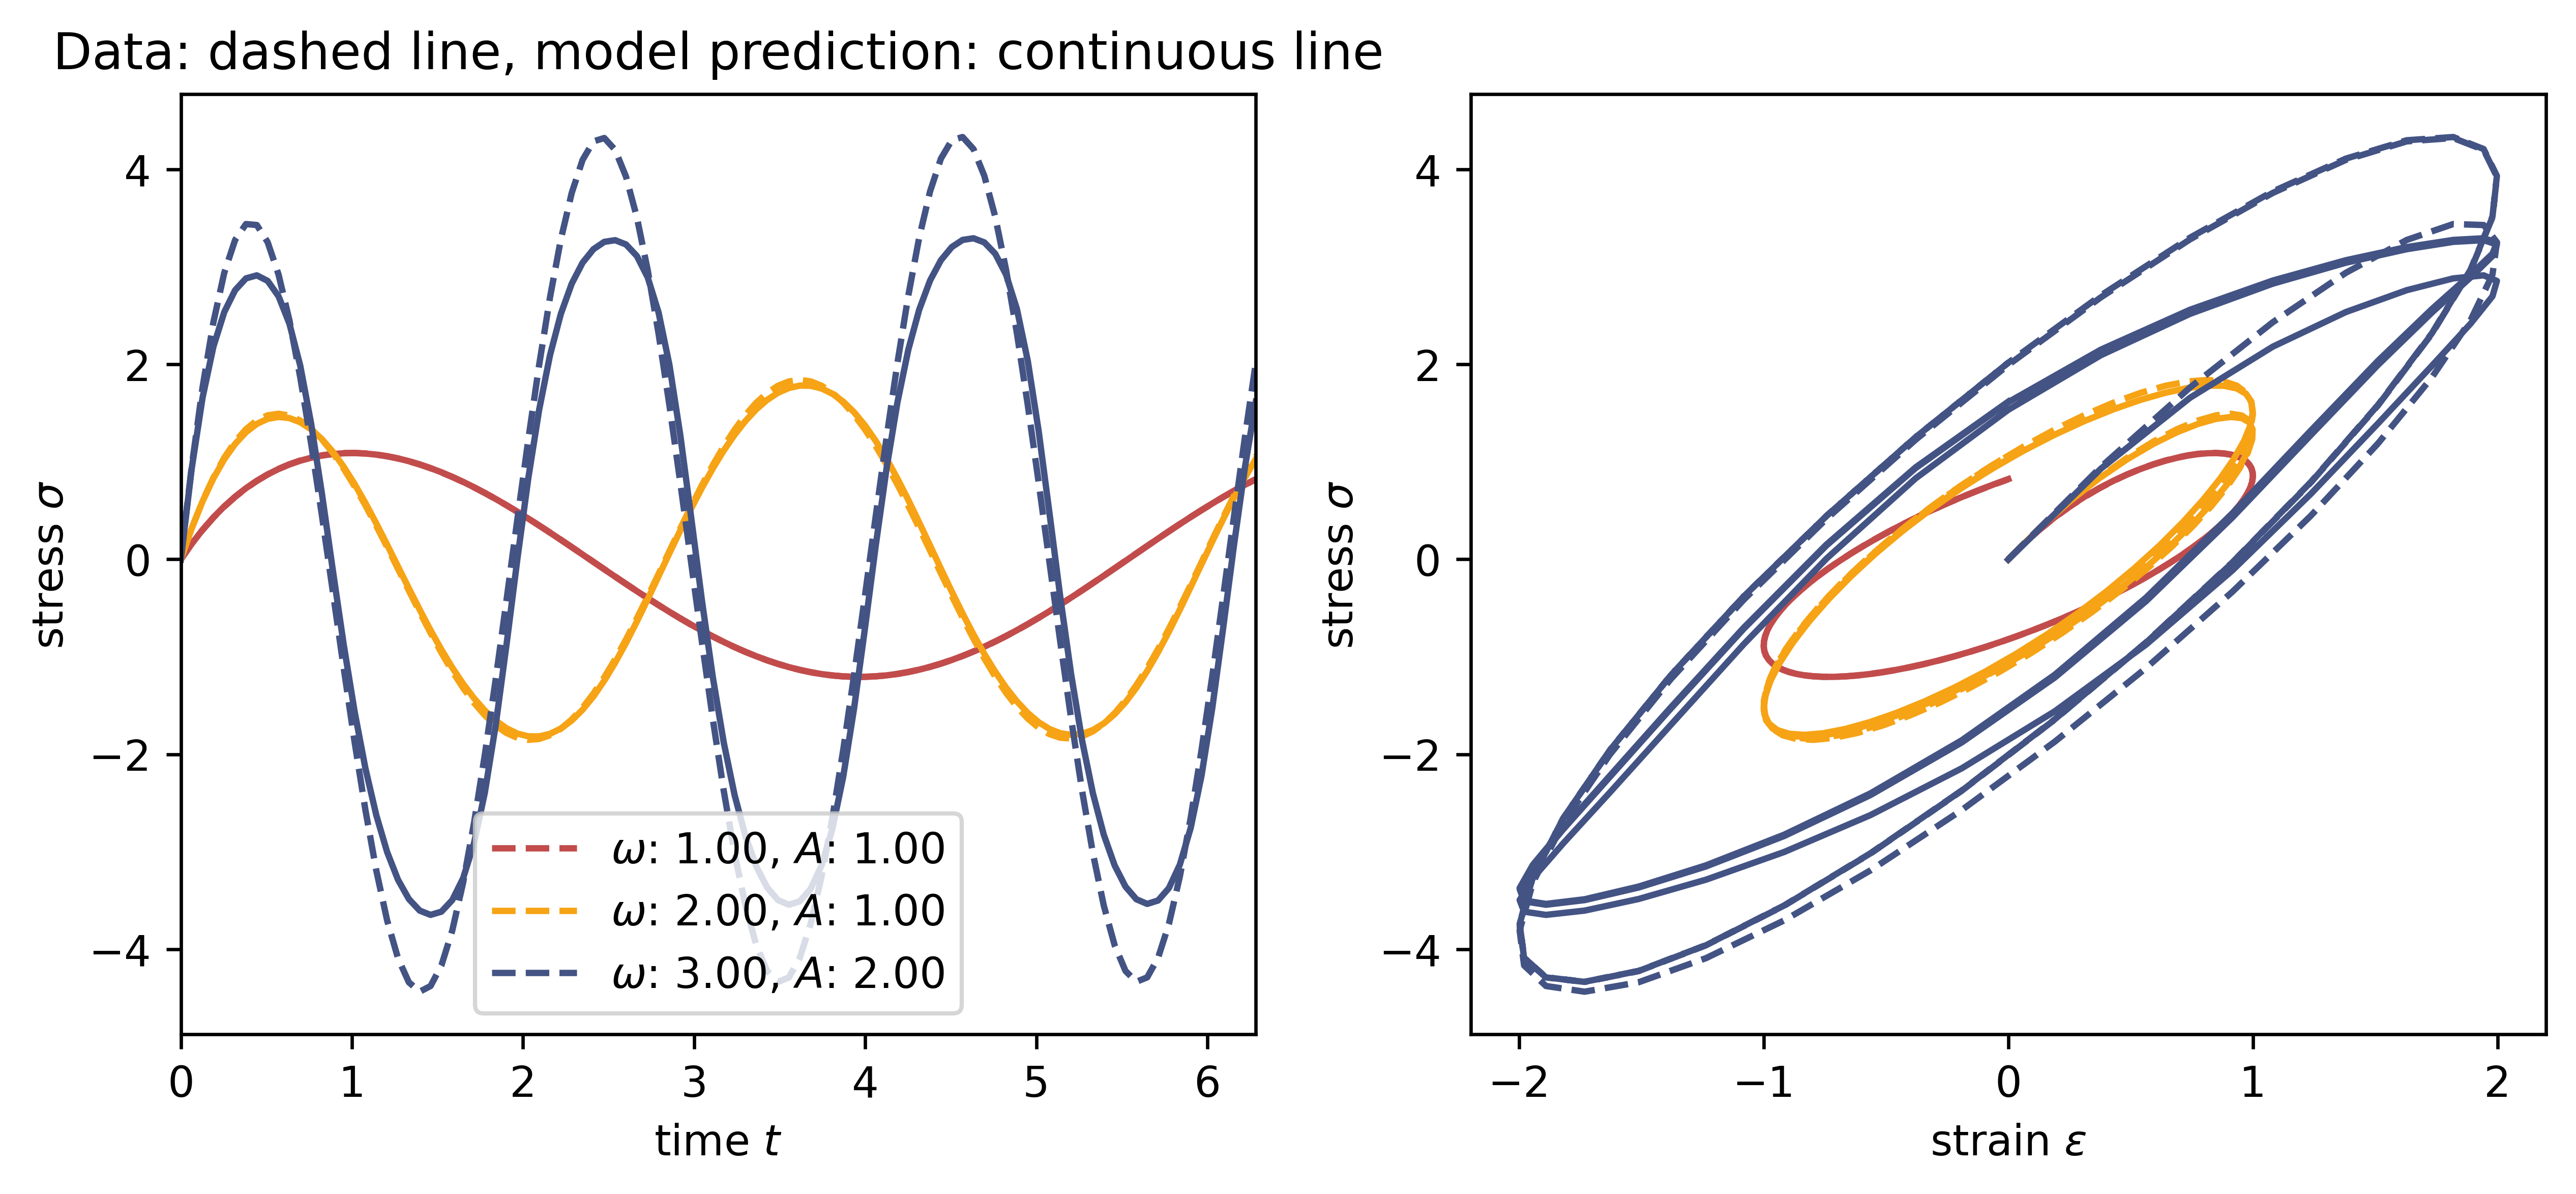

1/1 [==============================] - 0s 46ms/step


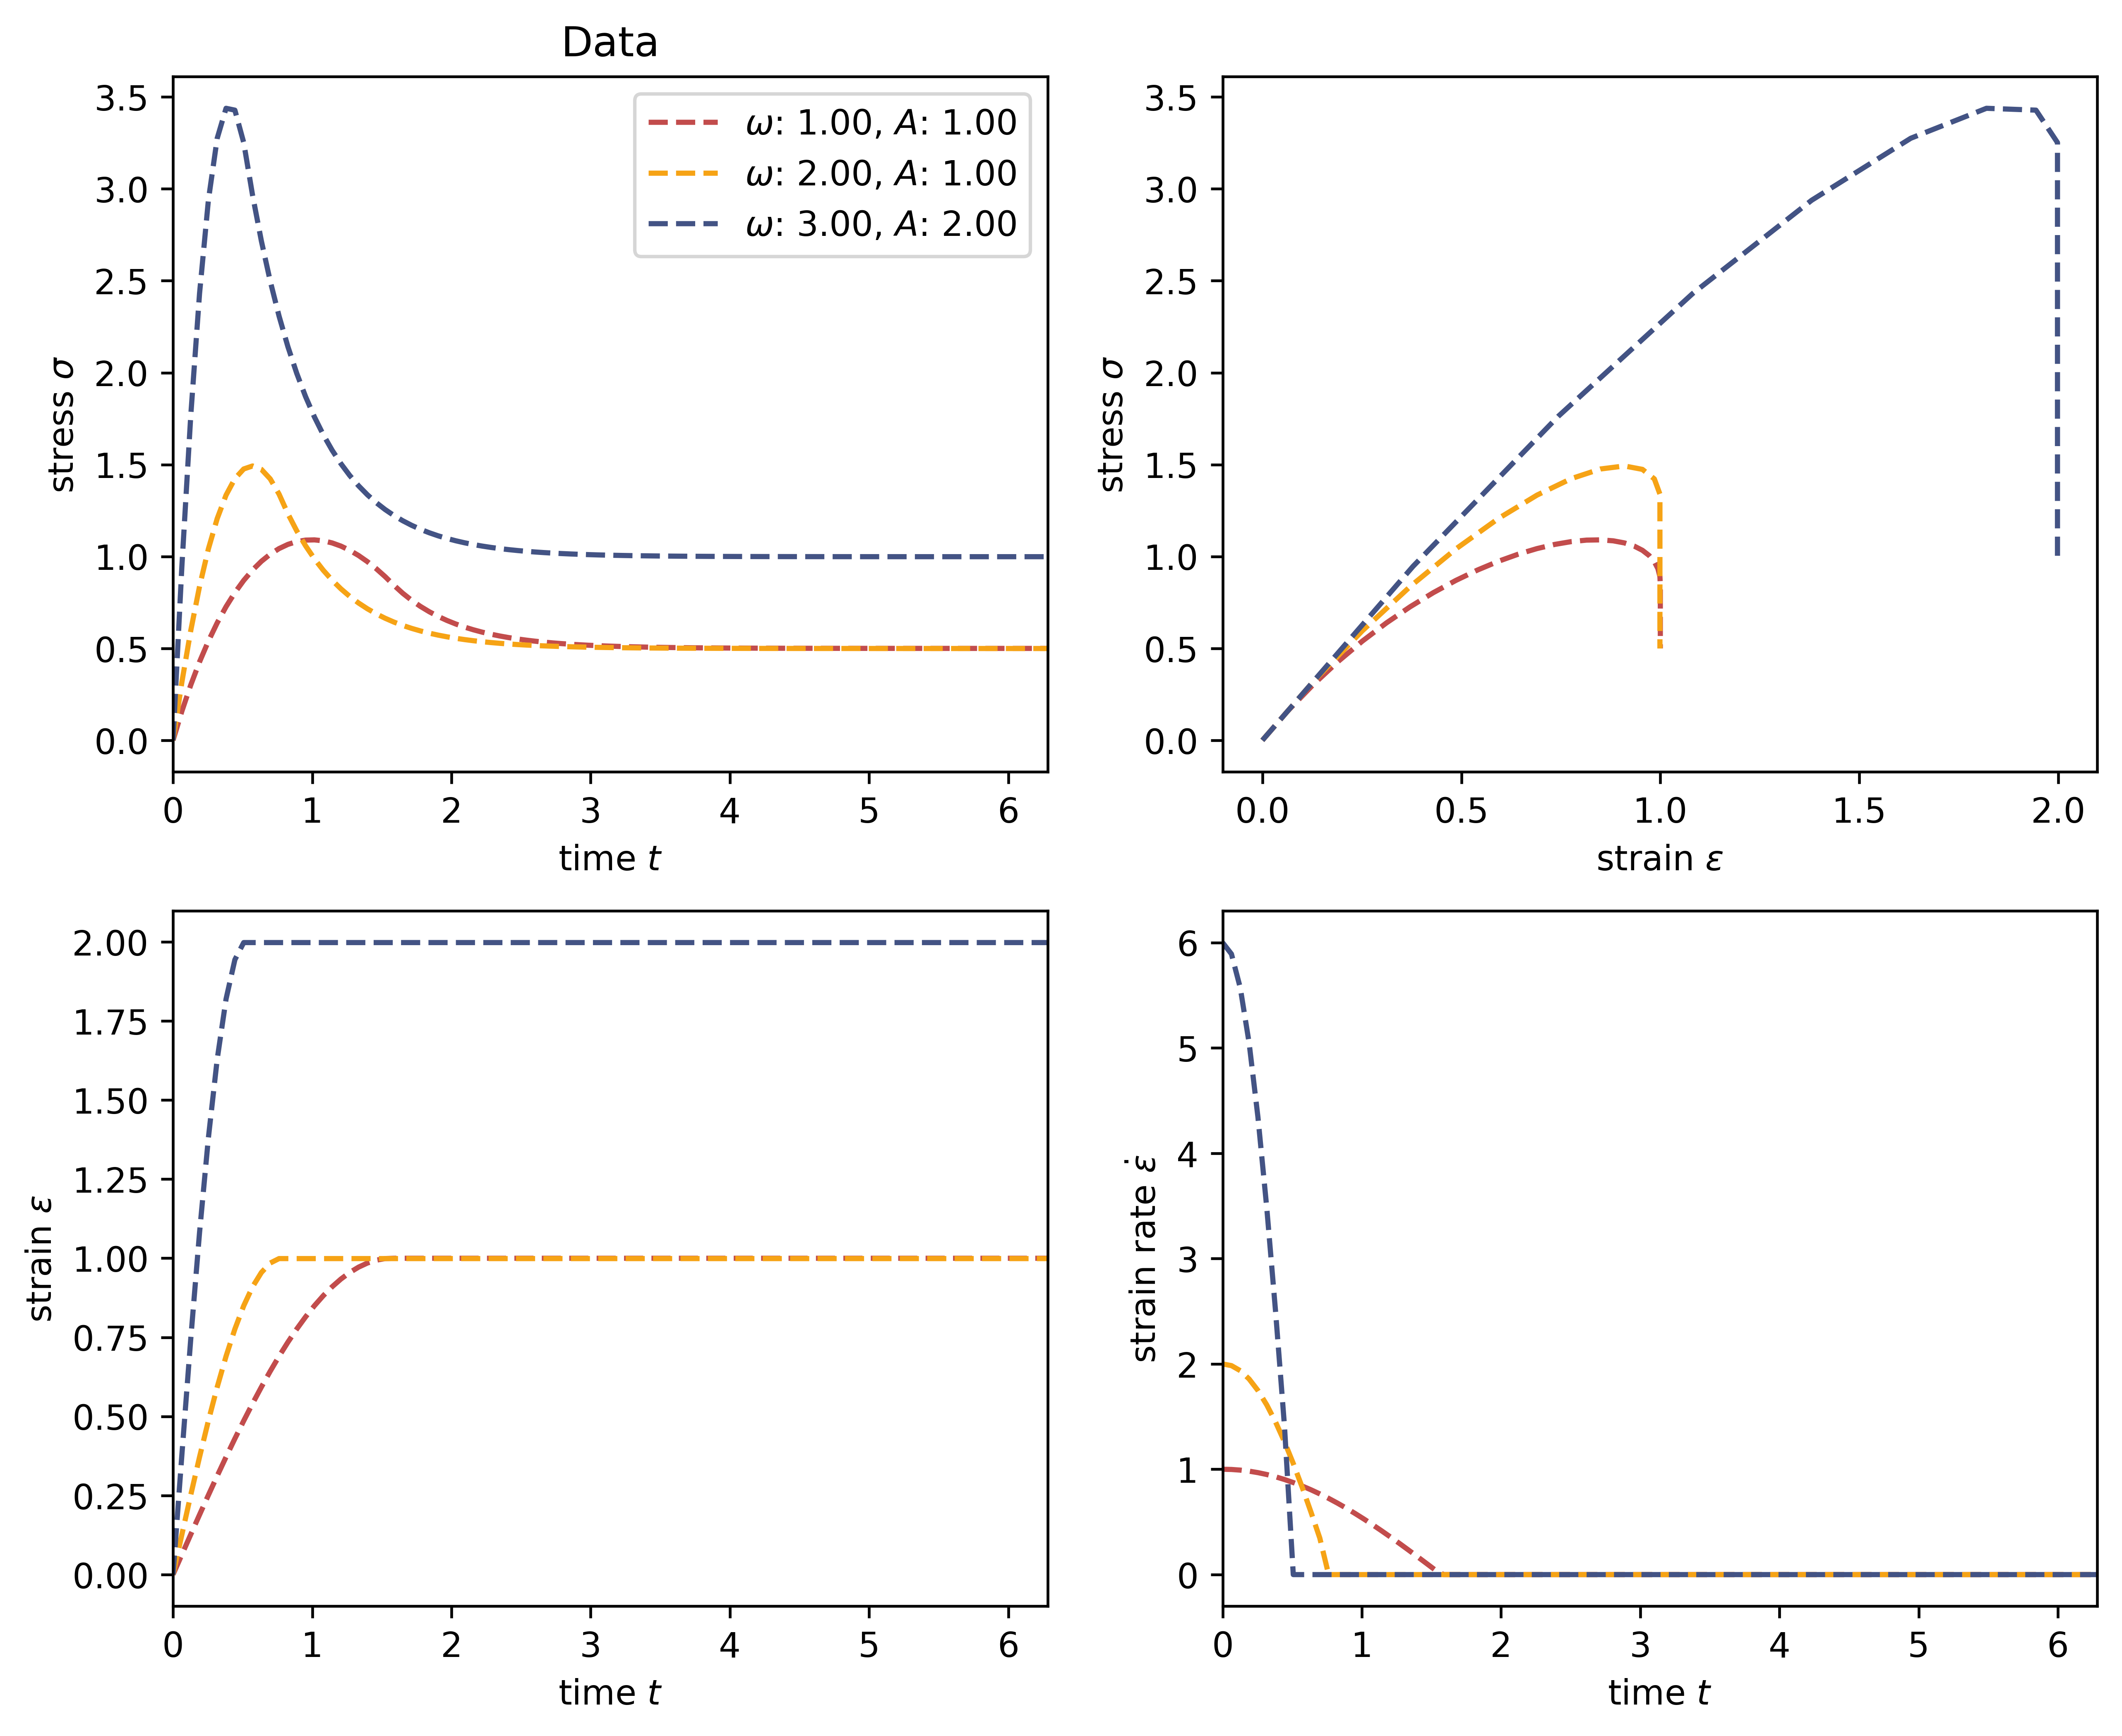

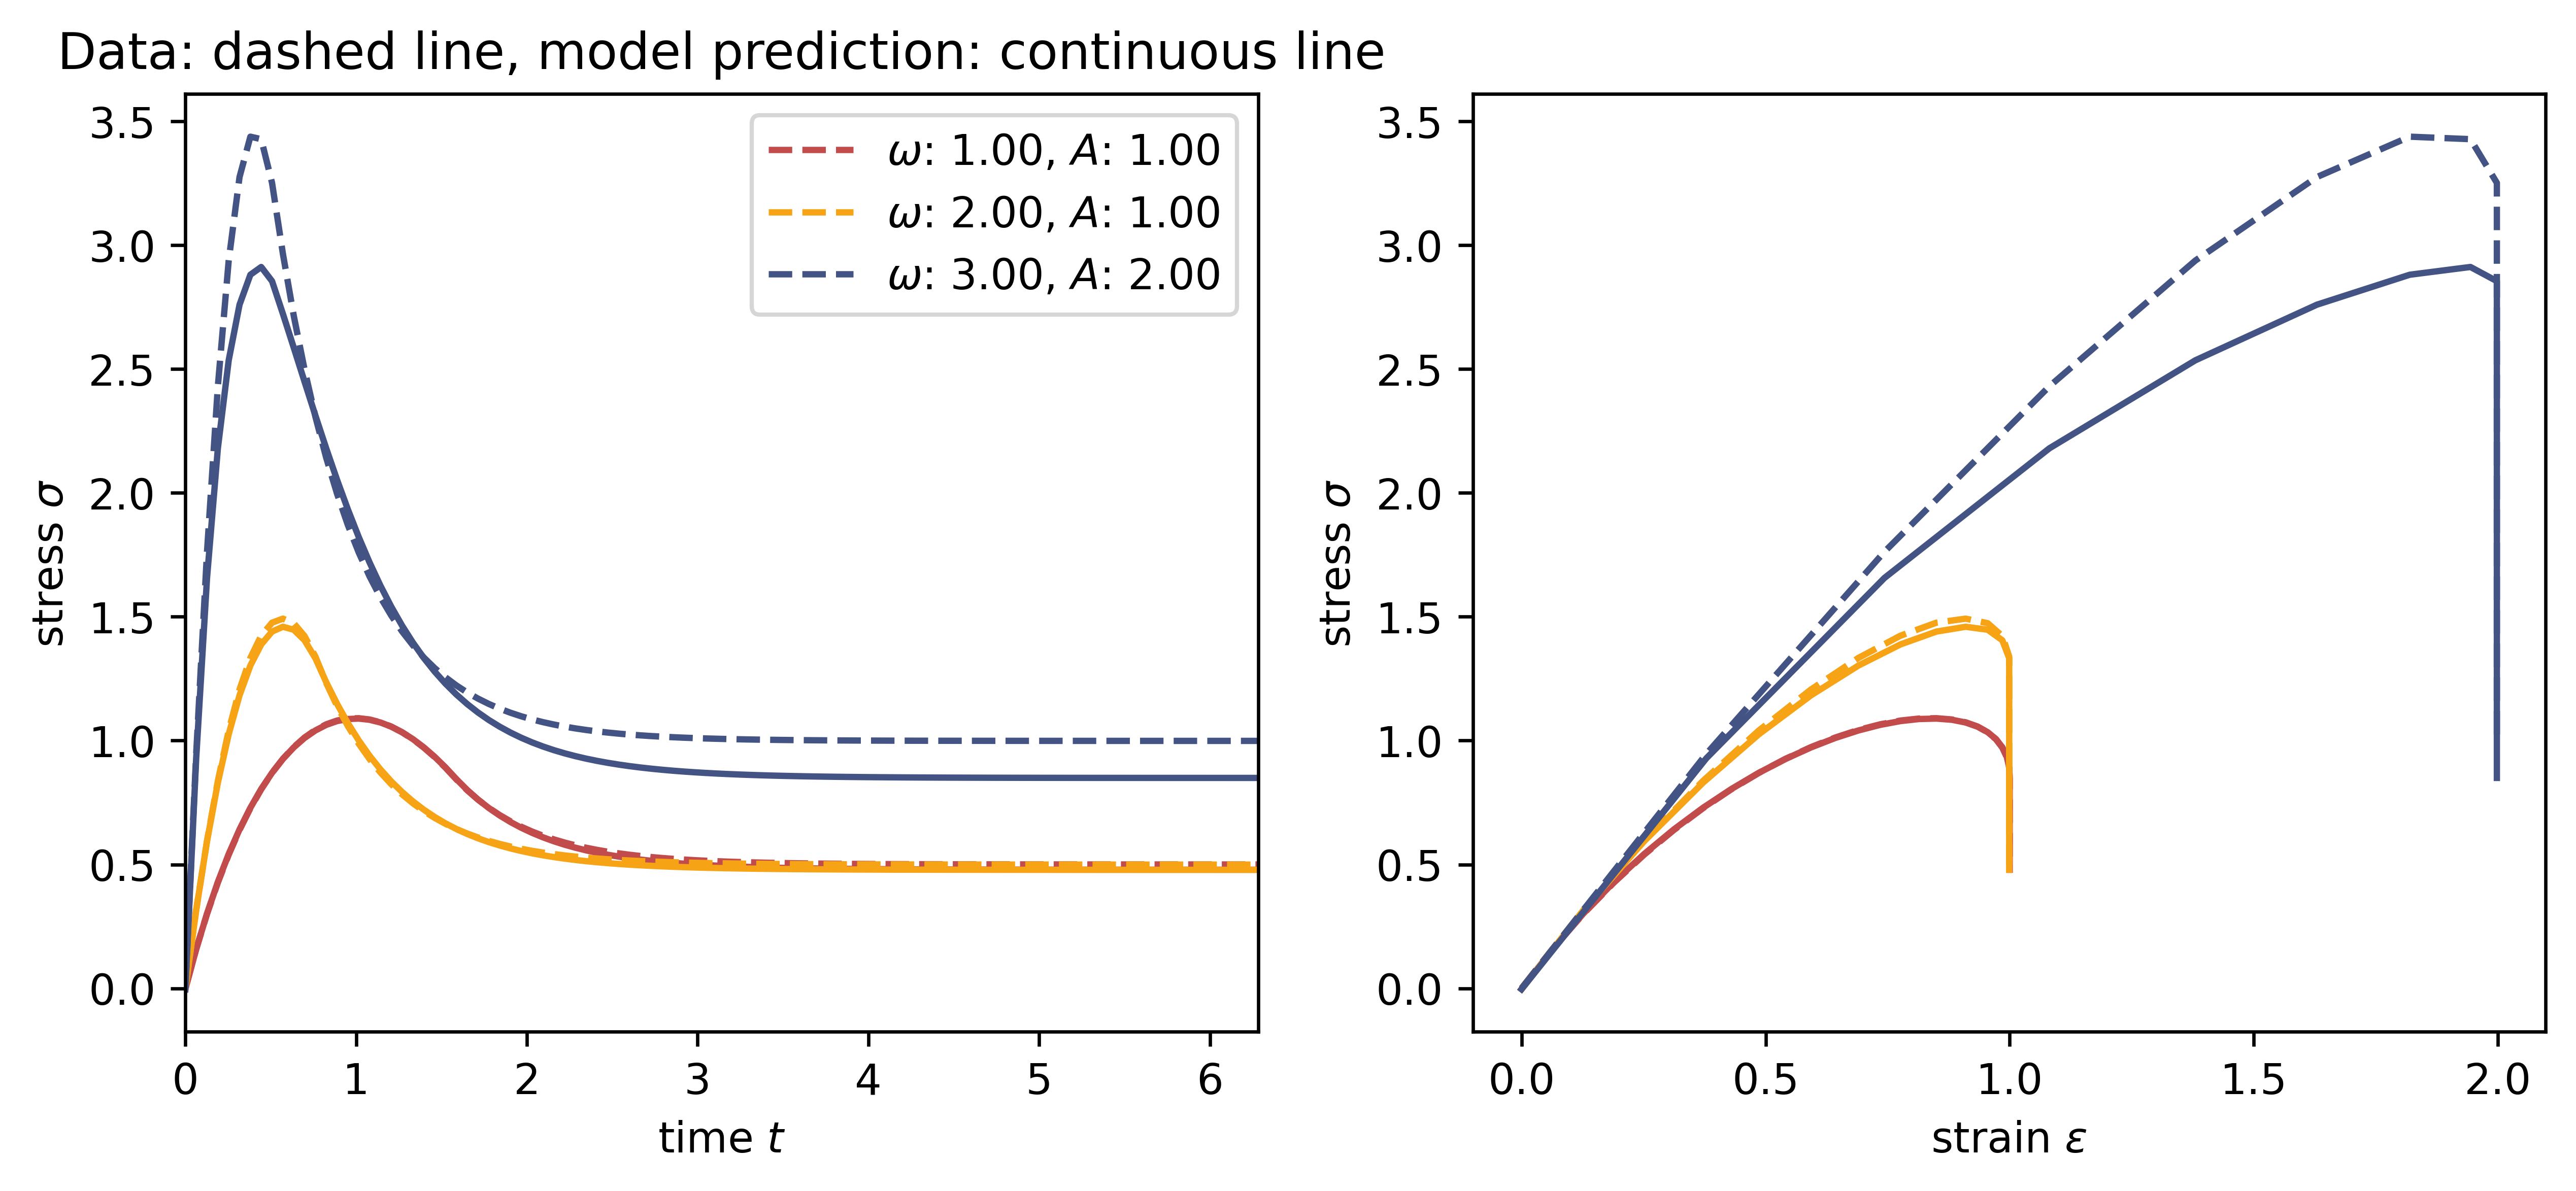

In [1]:
"""
Tutorial Machine Learning in Solid Mechanics (WiSe 23/24)
Task 4: Viscoelasticity
==================
Authors: Dominik K. Klein
         
01/2024
"""


# %%   
"""
Import modules

"""
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

# %% Own modules
import data as ld
import plots as lp
import gsm as hc2


# %%   
"""
Load and visualize data

"""


E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1]
As = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

lp.plot_data(eps, eps_dot, sig, omegas, As)



# %%   
"""
Load and evaluate model

"""

model2 = hc2.main()
t1 = now()
print(t1)

h = model2.fit([eps, dts], [sig], epochs = 5000,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

As = [1,1,2]
omegas = [1,2,3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model2.predict([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)
